
# **Number Recognition using the MNIST Dataset**

## **Introduction**

In the realm of machine learning and computer vision, the ability to accurately recognize handwritten digits is a fundamental task. The MNIST dataset stands as a cornerstone in this field, serving as a benchmark for evaluating various machine learning algorithms. This dataset, comprising 70,000 images of handwritten digits (0-9), is extensively used to train and test models in the domain of image classification.

## **Objective**

The primary objective of this project is to build a robust machine learning model capable of accurately identifying handwritten digits from the MNIST dataset. Leveraging convolutional neural networks (CNNs), a powerful architecture specifically designed for processing grid-like data such as images, we aim to achieve high accuracy in digit recognition tasks.

## **Methodology**

### ****1. Data Exploration and Preparation****

Firstly, we will explore the MNIST dataset to understand its structure and characteristics. This step involves loading the dataset, examining sample images, and gaining insights into the distribution of digit classes. Preprocessing steps such as normalization and reshaping will also be performed to prepare the data for model training.

### ****2. Model Architecture****

The core of our approach lies in designing an effective CNN architecture. CNNs are well-suited for image recognition tasks due to their ability to automatically learn hierarchical patterns in data. Our model will consist of convolutional layers for feature extraction, followed by pooling layers to reduce spatial dimensions, and fully connected layers for classification.

### ****3. Model Training****

With the architecture defined, the next step involves training the model on the MNIST training set. During training, the model will learn to minimize a specified loss function (e.g., categorical cross-entropy) by adjusting its weights using an optimization algorithm such as stochastic gradient descent (SGD). We will monitor training metrics such as accuracy and loss to assess model performance.

### ****4. Evaluation and Testing****

Once trained, the model will be evaluated on the MNIST test set to measure its generalization ability. Evaluation metrics such as accuracy, precision, recall, and F1-score will provide insights into the model's performance across different digit classes. We will visualize predictions and analyze any misclassifications to identify potential areas for improvement.

## **Conclusion**

In conclusion, this project aims to demonstrate the application of convolutional neural networks in the context of handwritten digit recognition using the MNIST dataset. By following a systematic approach of data exploration, model design, training, and evaluation, we seek to achieve a high level of accuracy and showcase the effectiveness of CNNs in image classification tasks.

## **Data Citation**

@article{lecun2010mnist,
  title={MNIST handwritten digit database},
  author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
  journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
  volume={2},
  year={2010}
}

## **Importing the Necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

## **Visualising our Variables**

In [ ]:
print(f"""
X_train
-------------
Shape: {X_train.shape}

y_train
-------------
shape: {y_train.shape}

X_test
-------------
shape: {X_test.shape}

y_test
-------------
shape: {y_test.shape}

""")


X_train
-------------
Shape: (60000, 28, 28)

y_train
-------------
shape: (60000,)

X_test
-------------    
shape: (10000, 28, 28)

y_test
-------------       
shape: (10000,)




## **Visualising our Images**

In [ ]:
def show_image(X, y, index):
  plt.imshow(X[index])
  plt.title(f'Number: {y[index]}')

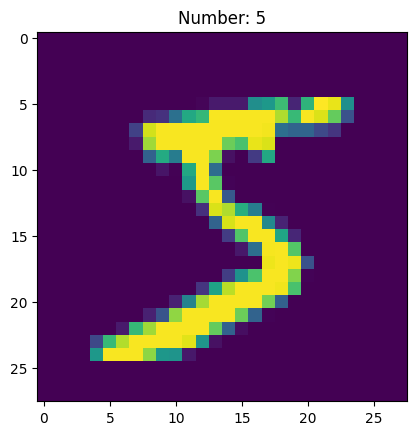

In [ ]:
show_image(X_train, y_train, 0)

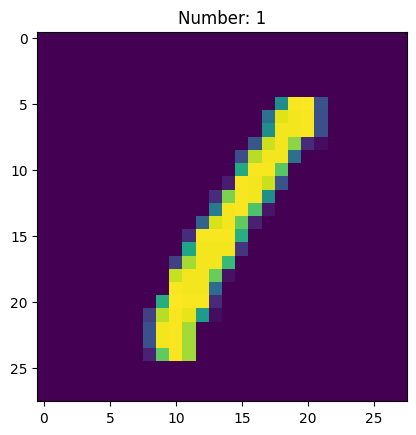

In [ ]:
show_image(X_train, y_train, 3)

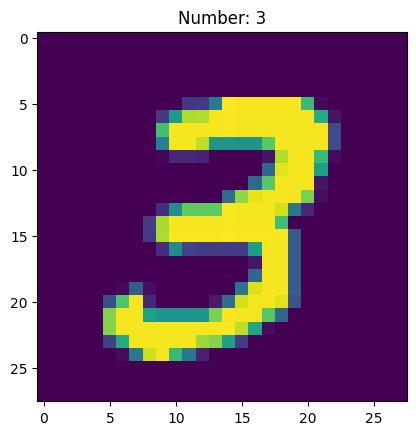

In [ ]:
show_image(X_train, y_train, 7)

## **Preprocessing our Data**

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_train.reshape(-1, 28, 28, 1) / 255

## **Creating our CNN model**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1636 - accuracy: 0.9493
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0166 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 45s 24m

## **Implementation**

Training Model
---------------------
Epoch 1/3
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1575 - accuracy: 0.9519
Epoch 2/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 3/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0362 - accuracy: 0.9885


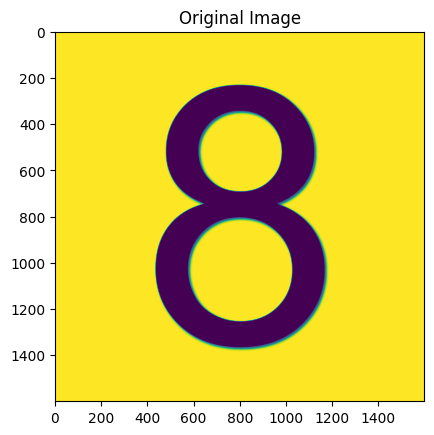

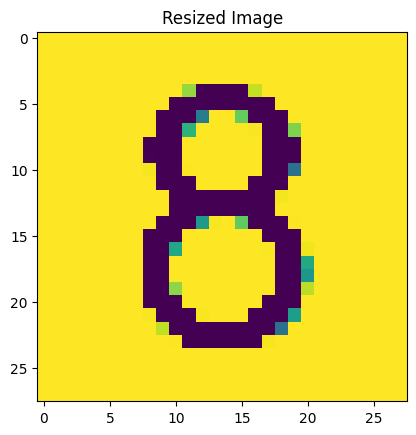

1/1 [==============================] - 0s 74ms/step


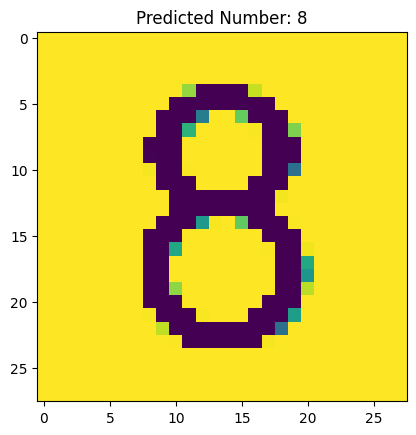

In [ ]:
import tensorflow as tf
import cv2
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


class NumberRecognition:
  def __init__(self):
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    self.X_train = X_train.reshape(-1, 28, 28, 1) / 255
    self.X_test = X_train.reshape(-1, 28, 28, 1) / 255
    self.cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=(2,2)),

      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=(2,2)),

      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])

  def train_model(self, epochs):
    self.cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

    print('Training Model')
    print('---------------------')

    self.cnn.fit(self.X_train, y_train, epochs=epochs)

  def recognise_image(self, image):
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    plt.imshow(image)
    plt.title('Original Image')
    plt.show()

    resized_image = cv2.resize(image, (28,28))

    plt.imshow(resized_image)
    plt.title('Resized Image')
    plt.show()

    normalized_image = resized_image / 255
    reshaped_image = normalized_image.reshape(-1, 28, 28, 1)

    raw_predictions = self.cnn.predict(reshaped_image)
    predictions = np.argmax(raw_predictions)

    plt.imshow(resized_image)
    plt.title(f'Predicted Number: {predictions}')
    plt.show()


model = NumberRecognition()
model.train_model(3)
model.recognise_image('eight.jpg')



## **Conclusion**

Based on the high accuracy rate of approximately 99%, it is evident that the number recognition system performs exceptionally well. This level of accuracy indicates that the system is reliable and effective for its intended purpose. Users can have confidence in its ability to correctly identify numbers with minimal errors, making it a valuable tool for various applications where precise number recognition is crucial.